In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

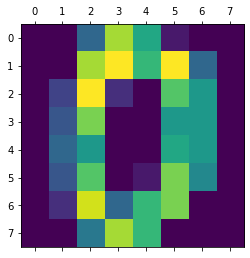

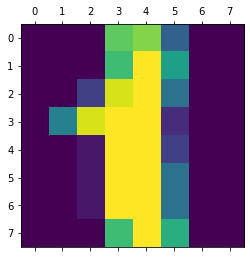

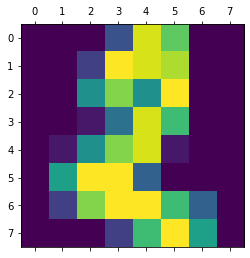

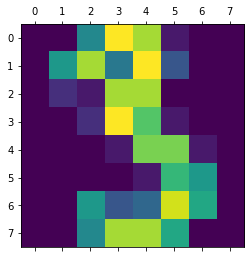

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [4]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [5]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
df['target'] = digits.target

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis = 'columns') , digits.target,test_size=0.2)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
model.score(X_test,y_test)

0.9861111111111112

In [29]:
y_predicted = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 25]], dtype=int64)

Text(69.0, 0.5, 'Truth')

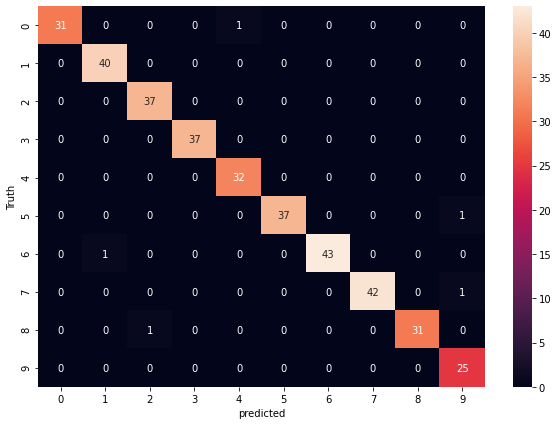

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [32]:
#already 98.66%accuracy achieved
#import pickle
#with open('./saved_model/random_forest_algorithm','wb') as f:
#    pickle.dump(model,f)

In [34]:
# Import the necessary libraries
from PIL import Image
from numpy import asarray


# load the image and convert into
# numpy array
img = Image.open("E://abhay.jpeg")
numpydata = asarray(img)

# data
print(numpydata)

[[[200 203 196]
  [200 203 196]
  [198 201 194]
  [200 203 196]
  [196 199 192]
  [199 202 195]
  [199 202 195]
  [200 203 196]]

 [[197 200 193]
  [199 202 195]
  [200 203 196]
  [201 204 197]
  [200 203 196]
  [201 204 197]
  [198 201 194]
  [198 201 194]]

 [[198 201 194]
  [200 203 196]
  [199 202 195]
  [195 198 191]
  [198 201 194]
  [199 202 195]
  [199 202 195]
  [199 202 195]]

 [[200 201 195]
  [201 204 197]
  [198 201 194]
  [190 193 186]
  [197 200 193]
  [197 200 193]
  [199 202 195]
  [201 204 197]]

 [[198 199 193]
  [202 203 197]
  [201 202 196]
  [196 197 191]
  [202 203 197]
  [201 202 196]
  [200 203 196]
  [199 202 195]]

 [[198 199 193]
  [202 203 197]
  [202 203 197]
  [200 201 195]
  [204 205 199]
  [203 204 198]
  [201 202 196]
  [200 201 195]]

 [[200 201 195]
  [201 202 196]
  [201 202 196]
  [201 202 196]
  [201 202 196]
  [202 203 197]
  [201 202 196]
  [202 203 197]]

 [[199 200 194]
  [200 201 195]
  [200 201 195]
  [204 205 199]
  [200 201 195]
  [202 203